In [1]:
#imports
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import os

In [2]:
#fetch data
ticker = 'QSR.TO'
tickerData = yf.Ticker(ticker)
df = tickerData.history(period='1d', start='2018-1-1', end='2023-01-01') #data from 2018 to 2023

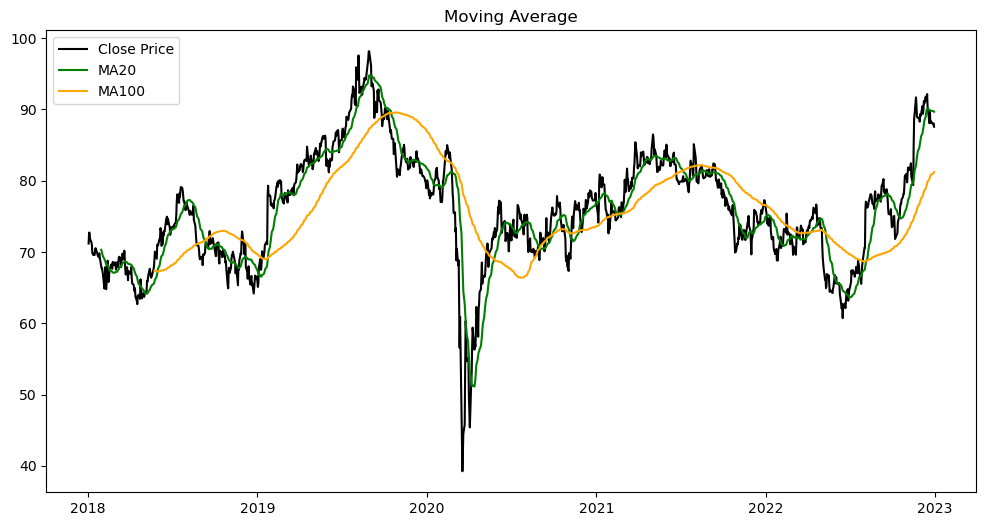

In [3]:
# Moving Average
df['MA20'] = df['Close'].rolling(20).mean()  # window size to 20 days
df['MA100'] = df['Close'].rolling(100).mean()  #  the window size to 100 days

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['MA20'], label='MA20', color='green')  #  color to green for MA20
plt.plot(df['MA100'], label='MA100', color='orange')  #  color to orange for MA100
plt.title('Moving Average')
plt.legend()  # Adding legend to display labels
plt.show()


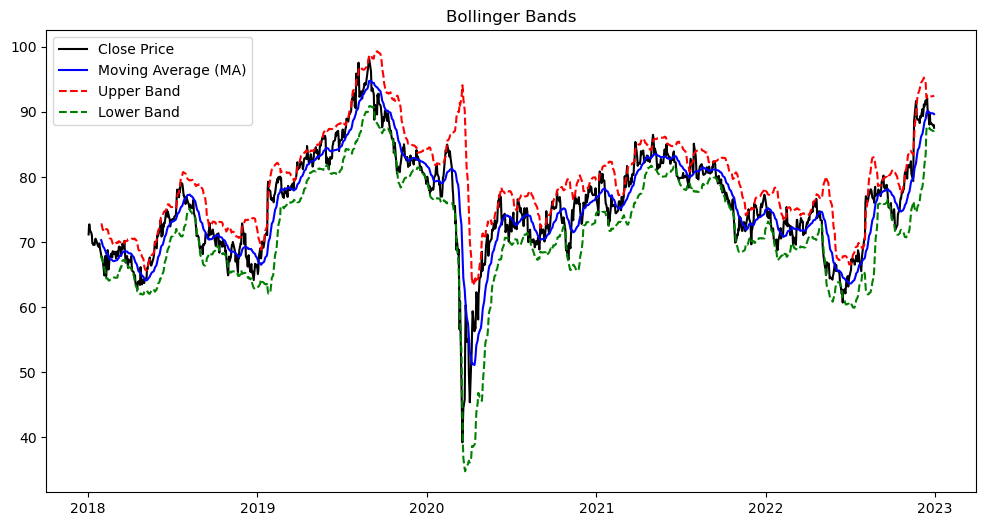

In [4]:
# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, window=20, num_std=2):
    # Calculate rolling mean and standard deviation
    df['MA'] = df['Close'].rolling(window).mean()
    df['std'] = df['Close'].rolling(window).std()

    # Calculate upper and lower bands
    df['Upper Band'] = df['MA'] + (df['std'] * num_std)
    df['Lower Band'] = df['MA'] - (df['std'] * num_std)

    return df

# Call the function to calculate Bollinger Bands
df_with_bollinger_bands = calculate_bollinger_bands(df)

# Plotting code
plt.figure(figsize=(12, 6))
plt.plot(df_with_bollinger_bands['Close'], label='Close Price', color='black')
plt.plot(df_with_bollinger_bands['MA'], label='Moving Average (MA)', color='blue')
plt.plot(df_with_bollinger_bands['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(df_with_bollinger_bands['Lower Band'], label='Lower Band', color='green', linestyle='--')
plt.title('Bollinger Bands')
plt.legend()
plt.show()


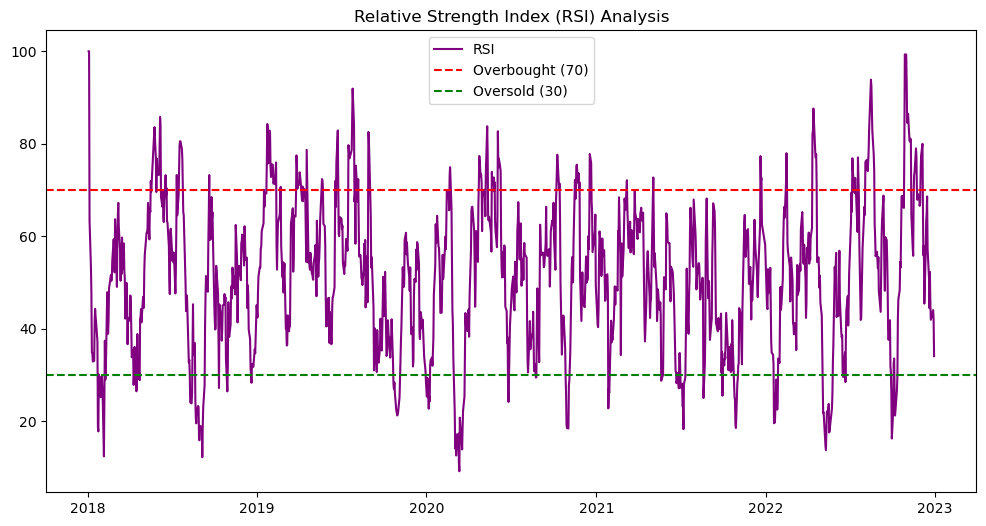

In [5]:
# Cell 4: Relative Strength Index (RSI) Analysis with Plotting

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(df, window=14):
    diff = df['Close'].diff(1)

    # Calculate the gain (positive difference) and loss (negative difference)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)

    # Calculate the rolling average of gains and losses
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculate the relative strength (RS)
    rs = avg_gain / avg_loss

    # Calculate the RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Call the function to calculate RSI
df['RSI'] = calculate_rsi(df)

# Plotting code for RSI
plt.figure(figsize=(12, 6))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) Analysis')
plt.legend()
plt.show()


In [6]:
# Create binary target variable 'Movement'
df['Movement'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your dataframe with features and target
# X should contain your features, y should contain your target variable
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Movement']  # Use 'Movement' as your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Now you can use the trained model for predictions


Accuracy: 0.4701195219123506


In [8]:
# Extract the latest row for prediction
latest_data_for_prediction = df.iloc[-1:]

# Extract relevant features for prediction
latest_open = latest_data_for_prediction['Open'].values[0]
latest_high = latest_data_for_prediction['High'].values[0]
latest_low = latest_data_for_prediction['Low'].values[0]
latest_close = latest_data_for_prediction['Close'].values[0]
latest_volume = latest_data_for_prediction['Volume'].values[0]

# Create a DataFrame for prediction
latest_data_for_prediction = pd.DataFrame({
    'Open': [latest_open],
    'High': [latest_high],
    'Low': [latest_low],
    'Close': [latest_close],
    'Volume': [latest_volume]
})

# Make predictions using the trained model
prediction = model.predict(latest_data_for_prediction)

print(f"Prediction for the next day: {prediction}")


Prediction for the next day: [0]
